## Feedforward Neural Network with PyTorch

### Model D : 2 Hidden Layer Feedforward Neural Network (Relu Activation)

Steps
* Load MNIST Dataset
* Make Dataset Iterable
* Create Model Class
* Instantiate Model Class
* Instantiate Loss Class
* Instantiate Optimizer Class
* Train Model

### Step 1 : Loading Train and Test MNIST dataset

** a. Loading MNIST Data set **

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [2]:
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

In [3]:
len(train_dataset)

60000

In [4]:
train_dataset[0]

(
 (0 ,.,.) = 
 
 Columns 0 to 8 
    0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.1176
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.1922  0.9333
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0706  0.8588
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.3137
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   

In [5]:
type(train_dataset[0])

tuple

** Tuple of (Image, Label) **

In [6]:
# Input Matrix
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [7]:
# Label
train_dataset[0][1]

5

** Displaying MNIST **

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [9]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [10]:
show_img = train_dataset[0][0].numpy().reshape(28, 28)

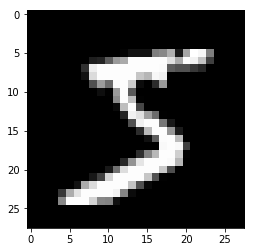

In [11]:
plt.imshow(show_img, cmap='gray')

In [12]:
# Label
train_dataset[0][1]

5

** b. Loading MNIST Test Dataset **

In [13]:
test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

In [14]:
len(test_dataset)

10000

In [15]:
type(test_dataset[0])

tuple

In [16]:
# Image Matrix
test_dataset[0][0].size()

torch.Size([1, 28, 28])

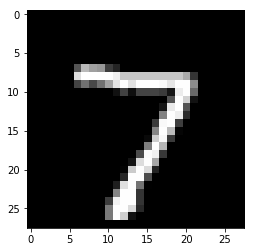

In [17]:
show_img = test_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

In [18]:
# Label
test_dataset[0][1]

7

### Step 2 : Make Dataset Iterable

* totaldata : 60000
* minibatch : 100
    * Number of examples in 1 iteration
* iterations : 3000
    * 1 iteration : one mini batch forward & backward pass
* epochs
    * 1 epoch : running through the whole dataset once
    * total : (iterations * minibatch) / totaldata = 5

In [19]:
len(train_dataset)

60000

In [20]:
batch_size = 100
n_iters = 3000

In [21]:
num_epochs = (n_iters * batch_size) / len(train_dataset)
num_epochs = int(num_epochs)
num_epochs

5

** Create Iterable Object : Training Dataset **

In [22]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size,
                                           shuffle=True)

** Check Iterability **

In [23]:
import collections
isinstance(train_loader, collections.Iterable)

True

** Create Iterable Object : Testing Dataset **

In [24]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=batch_size,
                                           shuffle=False)

** Check Iterability **

In [25]:
import collections
isinstance(test_loader, collections.Iterable)

True

### Step 3 : Building Model

In [26]:
class FeedForwardNeuralNetModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FeedForwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_size, hidden_size)
        # Non Linearity
        self.relu1 = nn.ReLU()
        
        # Linear function
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        # Non Linearity
        self.relu2 = nn.ReLU()
        
        # Linear function (readout)
        self.fc3 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.fc1(x) # Linear
        out = self.relu1(out) # non linear
        out = self.fc2(out) # Linear
        out = self.relu2(out) # non linear
        out = self.fc3(out) # linear
        return out

### Step 4 : Instantiate Model class

In [27]:
# size of images
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [28]:
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedForwardNeuralNetModel(input_dim, hidden_dim, output_dim)

### Step 5 : Instantiate Loss Class

In [29]:
# FFN has cross entropy loss (similar to logistic but linear regression has MSE)
criterion = nn.CrossEntropyLoss()

** What happens in `nn.CrossEntropyLoss()`? **
* Computes Softmax (logistic/softmax function)
* Computes cross entropy

### Step 6: Instantiate Optimizer Class

In [30]:
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

** Parameters In-Depth **

In [33]:
print(model.parameters())

print(len(list(model.parameters())))

# FC 1 Parameters
print(list(model.parameters())[0].size())

# FC 1 Bias Parameters
print(list(model.parameters())[1].size())

# FC 2 Parameters
print(list(model.parameters())[2].size())

# FC 2 Bias Parameters
print(list(model.parameters())[3].size())

# FC 3 Parameters
print(list(model.parameters())[4].size())

# FC 3 Bias Parameters
print(list(model.parameters())[5].size())

<generator object Module.parameters at 0x7fa74fc6cd00>
6
torch.Size([100, 784])
torch.Size([100])
torch.Size([100, 100])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


### Step 7: Train Model

In [34]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
    
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
    
        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss : softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images as Variable
                images = Variable(images.view(-1, 28*28))

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))

Iteration: 500. Loss: 0.37939777970314026. Accuracy: 88.67
Iteration: 1000. Loss: 0.213579460978508. Accuracy: 93.84
Iteration: 1500. Loss: 0.306217759847641. Accuracy: 94.47
Iteration: 2000. Loss: 0.19568592309951782. Accuracy: 95.51
Iteration: 2500. Loss: 0.17417114973068237. Accuracy: 96.31
Iteration: 3000. Loss: 0.041087355464696884. Accuracy: 96.59


In [35]:
save_model = False
if save_model is True:
    # Save only parameters
    torch.save(model.state_dict(), "ffn_2h_relu.pkl")

### If you keep on increasing the hidden layers, not necessary that accuracy increases, as the curse of dimensionality comes in, more parameters to train - so more data required.

---